# Importing Libraries

In [41]:
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import matplotlib.image as image
import os
import tempfile
import numpy as np
import shutil
import random
import pandas as pd
import seaborn as sns


Kaggle data storage directory.

In [2]:
directory = "/kaggle/input/flowers"

In This code are using the `os.listdir` function to retrieve a list of filenames within the specified directory. `The len(images)` function is then used to determine the number of items (in this case, image files) within the directory.

In [3]:
images = os.listdir(directory)
len(images)

733

In this code, a new list called `list_flowers` is initialized to store values. Then, a for loop iterates through the `images` list. Within the loop, the position variable is assigned the index of the underscore character in each filename using the `index` method. The substring from the start of the filename to the position of the underscore is then appended to the `list_flowers` using `list_flowers.append(loop[0:position])`.

After this, a set called `flowers_list` is created from the `list_flowers` to obtain unique flower names, and the number of unique flowers is determined by using the `len(flowers_list)` function.

In [4]:
list_flowers = []
for loop in images:
    position = loop.index("_")
    list_flowers.append(loop[0:position])

flowers_list = set(list_flowers)
len(flowers_list)

10

this code, a temporary directory is created using the `tempfile.TemporaryDirectory()` context manager. The path of the newly created temporary directory is then printed using the `print(temp_dir)`statement.

This approach is utilized because Kaggle does not permit the creation of directories directly, thus necessitating the use of a temporary directory for file operations.

In [5]:
with tempfile.TemporaryDirectory() as temp_dir:
    print(temp_dir)

/tmp/tmpf76zz31x


In [11]:
os.path.exists(temp_dir)

True

This code, for each unique `flower_name` in the `flowers_list`, a directory path is created using `os.path.join(temp_dir, flower_name)`. The `os.makedirs(path_created, exist_ok=True)` function is then used to ensure the directory is created if it does not exist, and the path of the created directory is printed.

Next, for each `image_name` in the `images list`, the code iterates through and extracts the name of the flower from the image file. If the extracted `image_flower` matches the current `flower_name`, the code copies the corresponding image file from the original `directory` to the newly created path_created using `shutil.copy(transfer_from, path_created)`.

Overall, this code effectively organizes the images into directories based on their associated flower types within the temporary directory.

In [7]:
for flower_name in flowers_list:
    path_created = os.path.join(temp_dir, flower_name)
    os.makedirs(path_created, exist_ok=True)
    print(path_created)
    for image_name in images:
        position = image_name.index("_")
        image_flower = image_name[0:position]

        if image_flower == flower_name:
            transfer_from = os.path.join(directory, image_name)
            shutil.copy(transfer_from, path_created)

/tmp/tmpf76zz31x/peonies
/tmp/tmpf76zz31x/orchids
/tmp/tmpf76zz31x/garden
/tmp/tmpf76zz31x/hydrangeas
/tmp/tmpf76zz31x/lilies
/tmp/tmpf76zz31x/daisies
/tmp/tmpf76zz31x/gardenias
/tmp/tmpf76zz31x/tulip
/tmp/tmpf76zz31x/hibiscus
/tmp/tmpf76zz31x/bougainvillea


I used the `os.walk` function in my code to traverse the directory tree rooted at a specific directory called `temp_dir`. During each iteration, the function returned a tuple consisting of the current root path, a list of all the directory names, and a list of all the files present in the current directory.

In order to get a better understanding of the directory structure and contents within the temporary directory, I used a print statement to output the number of directories and files present in each root directory. This way, I was able to get a comprehensive summary of the contents within the temporary directory.

In [49]:
for root, directory , files in os.walk(temp_dir):
    print(f"No of directory are {len(directory)} and files {len(files)} in {root}")

No of directory are 10 and files 0 in /tmp/tmpf76zz31x
No of directory are 0 and files 74 in /tmp/tmpf76zz31x/hibiscus
No of directory are 0 and files 75 in /tmp/tmpf76zz31x/peonies
No of directory are 0 and files 71 in /tmp/tmpf76zz31x/tulip
No of directory are 0 and files 74 in /tmp/tmpf76zz31x/garden
No of directory are 0 and files 64 in /tmp/tmpf76zz31x/orchids
No of directory are 0 and files 81 in /tmp/tmpf76zz31x/lilies
No of directory are 0 and files 60 in /tmp/tmpf76zz31x/hydrangeas
No of directory are 0 and files 77 in /tmp/tmpf76zz31x/gardenias
No of directory are 0 and files 83 in /tmp/tmpf76zz31x/daisies
No of directory are 0 and files 74 in /tmp/tmpf76zz31x/bougainvillea


In [9]:
train_dir = temp_dir
test_dir = temp_dir

In this code, a function `build_model_1` is defined to construct and configure a TensorFlow model with hyperparameters. The function incorporates image data augmentation using `tf.keras.preprocessing.image.ImageDataGenerator`, defines a trainable model architecture using InceptionResNetV2, and compiles the model with specific loss, optimizer, and metrics.

A `kt.RandomSearch` tuner is then utilized to perform a hyperparameter search for the defined model. The tuner seeks to optimize the model's performance based on the specified objective, with a defined maximum number of trials and executions per trial. The tuner.search method initiates the hyperparameter search using the provided training and validation datasets for a specified number of epochs.

In [20]:
import tensorflow as tf
import keras_tuner as kt

def build_model_1(hp):

    data_train_argumentation_1 = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1/255.,
        height_shift_range=hp.Float("Height_shift_range", min_value=0.2, max_value=0.8, step=0.1),
        width_shift_range=hp.Float("Width_shift_range", min_value=0.2, max_value=0.8, step=0.1),
        rotation_range=hp.Int("rotation_range", min_value=0, max_value=90, step=1),
        zoom_range=hp.Float("zoom_range", min_value=0.2, max_value=0.8, step=0.1),
        shear_range=hp.Float("shear_range", min_value=0.2, max_value=0.8, step=0.1),
        brightness_range=(hp.Float("min_brightness_range", min_value=0.2, max_value=0.5, step=0.1),
                          hp.Float("max_brightness_range", min_value=0.5, max_value=0.8, step=0.1)),
        horizontal_flip=hp.Boolean("horizontal_flip"),
        vertical_flip=hp.Boolean("vertical_flip")
    )
    
    global train_data
    global test_data
    

    train_data = data_train_argumentation_1.flow_from_directory(directory=train_dir,
                                                             target_size=(224, 224),
                                                             batch_size=10)

    
    test_data = data_train_argumentation_1.flow_from_directory(directory=test_dir,
                                                             target_size=(224, 224),
                                                             batch_size=10)

    
    
    pretrained_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="avg",
    classes = 10
        )
                    
    for layer in pretrained_model.layers:
        layer.trainable = False
        
    model_1 = tf.keras.Sequential()  
    model_1.add(pretrained_model)    
    model_1.add(tf.keras.layers.Flatten())
    model_1.add(tf.keras.layers.Dense(10,"softmax"))
        

    model_1.compile(
        loss=tf.keras.losses.CategoricalFocalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="LOG")),
        metrics=['accuracy']
    )

    return model_1


tuner = kt.RandomSearch(
    build_model_1,
    objective='accuracy',
    max_trials=10,
    executions_per_trial=3
)

tuner.search(train_data, validation_data = test_data, epochs = 5)

Trial 10 Complete [00h 12m 50s]
accuracy: 0.847203274567922

Best accuracy So Far: 0.847203274567922
Total elapsed time: 02h 05m 43s


In [21]:
best_hps = tuner.get_best_hyperparameters(num_trials= 1)[0]

The best-performing model configuration is constructed using the `tuner.hypermodel.build` method, wherein the optimal hyper (referred to as `best_hps`) determined during the hyperparameter search are utilized to instantiate the best model configuration.

Subsequently, the constructed `best_model` undergoes a training process using the fit method. The training is conducted with the specified training and validation datasets over 100 epochs, and early stopping is incorporated as a callback to cease training if the validation loss does not improve after 5 epochs.

In [22]:
best_model = tuner.hypermodel.build(best_hps)
call= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = best_model.fit(train_data, validation_data=test_data, epochs=100,callbacks=[call])

Found 733 images belonging to 10 classes.
Found 733 images belonging to 10 classes.
Epoch 1/100
74/74 [==============================] - 61s 685ms/step - loss: 0.3437 - accuracy: 0.4052 - val_loss: 0.1788 - val_accuracy: 0.6439
Epoch 2/100
74/74 [==============================] - 46s 629ms/step - loss: 0.1866 - accuracy: 0.6139 - val_loss: 0.1618 - val_accuracy: 0.6862
Epoch 3/100
74/74 [==============================] - 47s 636ms/step - loss: 0.1843 - accuracy: 0.6521 - val_loss: 0.1691 - val_accuracy: 0.6726
Epoch 4/100
74/74 [==============================] - 47s 638ms/step - loss: 0.1647 - accuracy: 0.6726 - val_loss: 0.1563 - val_accuracy: 0.6685
Epoch 5/100
74/74 [==============================] - 47s 642ms/step - loss: 0.1612 - accuracy: 0.6671 - val_loss: 0.1146 - val_accuracy: 0.7572
Epoch 6/100
74/74 [==============================] - 46s 624ms/step - loss: 0.1515 - accuracy: 0.6999 - val_loss: 0.1282 - val_accuracy: 0.7462
Epoch 7/100
74/74 [==============================] -

<Axes: >

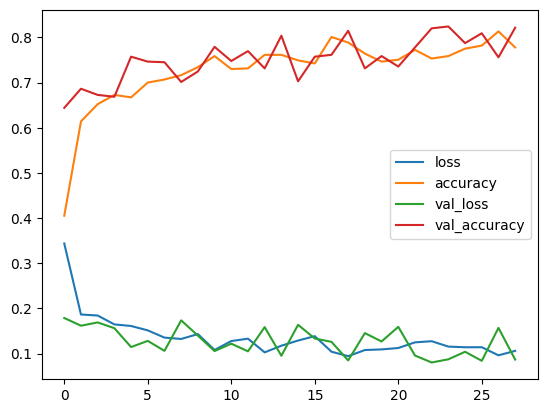

In [28]:
pd.DataFrame(history.history).plot()

74/74 [==============================] - 22s 299ms/step


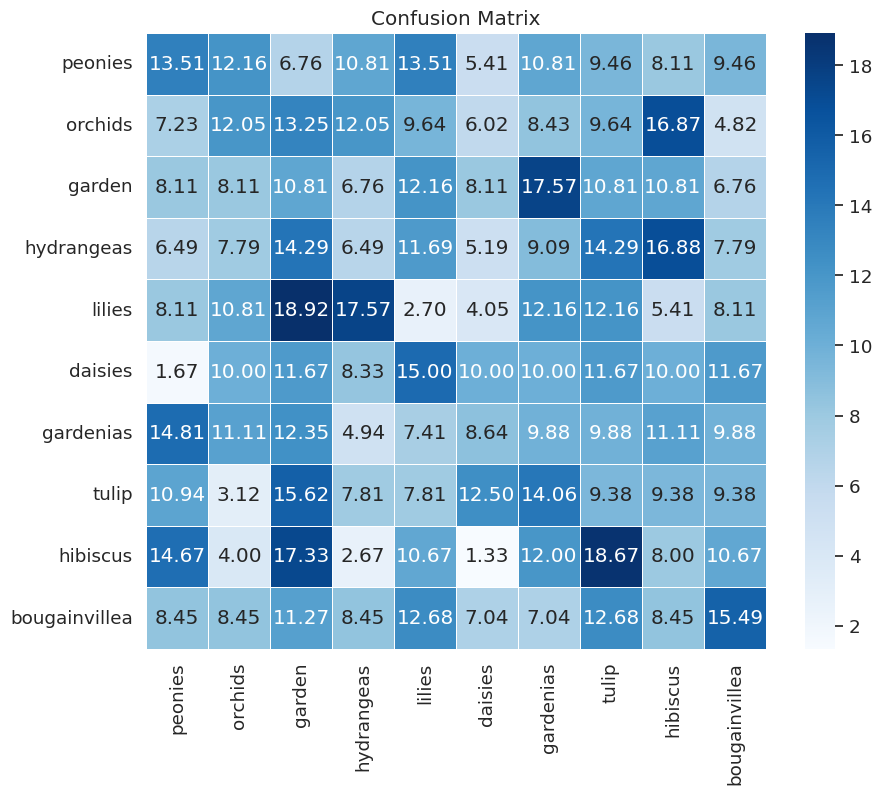

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predictions = best_model.predict(test_data)  
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sum_per_class = conf_matrix.sum(axis=1) 
conf_matrix_percent = (conf_matrix.T / sum_per_class).T * 100  
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", linewidths= 0.5, xticklabels= flowers_list , yticklabels= flowers_list)  
plt.title('Confusion Matrix')
plt.show()
